The following information is based on the Open University Learning Analytics Dataset (OULAD): https://www.kaggle.com/anlgrbz/student-demographics-online-education-dataoulad Accessed: 19.06.21

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
# import studentInfo.csv
dfstudent = pd.read_csv ('~/Datascience/OUdata/studentInfo.csv')

In [25]:
dfstudent.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


In [62]:
#Explore an overview of the student info data
dfstudent.shape

(32593, 12)

In [63]:
#review stats on numerical categories
dfstudent.describe ()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [64]:
#check categories and missing values
dfstudent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [71]:
#create new dataframe of gender and final_result
df1 = dfstudent.iloc[:,[3,11]]
print (df1)

      gender final_result
0          M         Pass
1          F         Pass
2          F    Withdrawn
3          F         Pass
4          F         Pass
...      ...          ...
32588      F         Fail
32589      F  Distinction
32590      F         Pass
32591      F    Withdrawn
32592      F  Distinction

[32593 rows x 2 columns]


In [72]:
df1.head()

,gender,final_result
0,M,Pass
1,F,Pass
2,F,Withdrawn
3,F,Pass
4,F,Pass


<AxesSubplot:title={'center':'Number of students by gender'}>

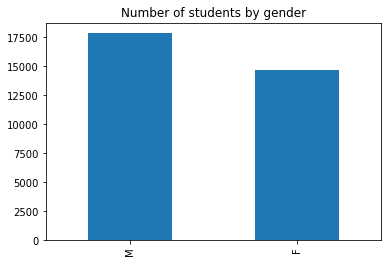

In [83]:
#plot simple bar chart for gender variable
df1['gender'].value_counts().plot(kind='bar', title = 'Number of students by gender')

<AxesSubplot:>

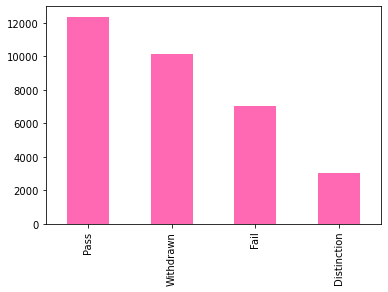

In [82]:
#plot simple bar chart for final results variable and change bar color
df1['final_result'].value_counts().plot(kind='bar', color = 'hotpink')

In [66]:
dfstudent.groupby('final_result').groups

{'Distinction': [43, 78, 87, 115, 124, 130, 143, 167, 180, 206, 226, 229, 250, 279, 301, 314, 337, 368, 378, 379, 385, 413, 424, 453, 462, 464, 465, 470, 499, 510, 517, 544, 556, 569, 578, 590, 602, 610, 654, 656, 686, 695, 715, 738, 761, 766, 769, 777, 786, 793, 796, 798, 813, 821, 846, 857, 863, 864, 903, 936, 941, 983, 1004, 1009, 1049, 1051, 1074, 1095, 1148, 1156, 1158, 1162, 1172, 1204, 1211, 1218, 1222, 1226, 1237, 1239, 1241, 1242, 1248, 1273, 1303, 1310, 1334, 1337, 1350, 1357, 1359, 1366, 1384, 1407, 1465, 1473, 1475, 1496, 1532, 1540, ...], 'Fail': [18, 52, 53, 70, 76, 86, 88, 100, 111, 117, 118, 129, 133, 134, 155, 160, 165, 169, 172, 173, 178, 189, 193, 201, 209, 216, 220, 224, 240, 242, 245, 249, 272, 277, 286, 302, 303, 304, 312, 319, 323, 324, 361, 372, 374, 395, 409, 425, 427, 439, 447, 460, 472, 477, 485, 492, 493, 496, 507, 515, 519, 535, 552, 554, 557, 558, 574, 575, 579, 586, 591, 603, 605, 615, 633, 639, 665, 673, 675, 684, 701, 703, 706, 708, 724, 725, 729, 732, 

In [67]:
dfstudent.groupby('final_result').get_group('Distinction')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
43,AAA,2013J,134143,F,South East Region,A Level or Equivalent,90-100%,35-55,0,60,N,Distinction
78,AAA,2013J,187100,M,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Distinction
87,AAA,2013J,227499,F,London Region,A Level or Equivalent,10-20,35-55,0,60,N,Distinction
115,AAA,2013J,279572,M,London Region,Lower Than A Level,40-50%,0-35,0,60,N,Distinction
124,AAA,2013J,291334,M,South East Region,A Level or Equivalent,90-100%,35-55,0,60,N,Distinction
...,...,...,...,...,...,...,...,...,...,...,...,...
32572,GGG,2014J,2270562,F,South East Region,Lower Than A Level,60-70%,35-55,0,30,N,Distinction
32579,GGG,2014J,2373245,M,East Midlands Region,Lower Than A Level,20-30%,35-55,0,30,N,Distinction
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction


In [68]:
dfstudent.groupby('final_result').get_group('Withdrawn')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
15,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn
22,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn
29,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn
41,AAA,2013J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,GGG,2014J,2338614,F,Scotland,A Level or Equivalent,0-10%,35-55,0,30,Y,Withdrawn
32577,GGG,2014J,2342238,M,Ireland,HE Qualification,80-90%,0-35,0,30,N,Withdrawn
32578,GGG,2014J,2357806,F,Ireland,Lower Than A Level,40-50%,35-55,0,30,N,Withdrawn
32586,GGG,2014J,2608143,M,East Midlands Region,HE Qualification,60-70%,35-55,0,30,N,Withdrawn


In [60]:
gender_result = dfstudent.groupby(['gender', 'final_result'])
gender_result.groups

{('F', 'Distinction'): [43, 87, 279, 301, 379, 385, 413, 462, 517, 610, 654, 695, 738, 761, 766, 769, 786, 793, 796, 798, 813, 821, 857, 863, 864, 903, 936, 941, 983, 1009, 1051, 1074, 1095, 1148, 1156, 1158, 1162, 1211, 1218, 1222, 1226, 1237, 1239, 1241, 1242, 1248, 1273, 1303, 1334, 1337, 1350, 1357, 1359, 1366, 1384, 1407, 1465, 1473, 1475, 1496, 1532, 1540, 1545, 1608, 1624, 1653, 1689, 1697, 1707, 1712, 1714, 1725, 1733, 1736, 1746, 1771, 1796, 1868, 1883, 1897, 1914, 1920, 1925, 1938, 1953, 1967, 1973, 1998, 2030, 2050, 2052, 2077, 2079, 2083, 2096, 2108, 2111, 2121, 2131, 2143, ...], ('F', 'Fail'): [52, 70, 100, 133, 155, 169, 209, 242, 245, 272, 277, 286, 303, 304, 312, 324, 374, 395, 439, 460, 477, 515, 535, 554, 557, 558, 605, 615, 665, 675, 684, 701, 706, 708, 724, 729, 732, 734, 747, 748, 760, 762, 764, 765, 767, 772, 773, 788, 800, 801, 805, 809, 810, 812, 824, 828, 832, 833, 834, 839, 842, 844, 845, 853, 854, 856, 858, 869, 871, 873, 878, 887, 894, 897, 906, 909, 911, 91

In [69]:
gender_result.get_group(('F', 'Distinction'))

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
43,AAA,2013J,134143,F,South East Region,A Level or Equivalent,90-100%,35-55,0,60,N,Distinction
87,AAA,2013J,227499,F,London Region,A Level or Equivalent,10-20,35-55,0,60,N,Distinction
279,AAA,2013J,2122180,F,North Western Region,Lower Than A Level,80-90%,35-55,0,60,N,Distinction
301,AAA,2013J,2339528,F,London Region,Lower Than A Level,40-50%,0-35,0,60,N,Distinction
379,AAA,2013J,2691206,F,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Distinction
...,...,...,...,...,...,...,...,...,...,...,...,...
32557,GGG,2014J,1827650,F,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,30,N,Distinction
32572,GGG,2014J,2270562,F,South East Region,Lower Than A Level,60-70%,35-55,0,30,N,Distinction
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction


In [75]:
gender_result.get_group(('M', 'Distinction',))

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
78,AAA,2013J,187100,M,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Distinction
115,AAA,2013J,279572,M,London Region,Lower Than A Level,40-50%,0-35,0,60,N,Distinction
124,AAA,2013J,291334,M,South East Region,A Level or Equivalent,90-100%,35-55,0,60,N,Distinction
130,AAA,2013J,296332,M,South Region,Post Graduate Qualification,90-100%,55<=,0,60,N,Distinction
143,AAA,2013J,312537,M,South Region,Post Graduate Qualification,90-100%,55<=,0,60,N,Distinction
...,...,...,...,...,...,...,...,...,...,...,...,...
32322,GGG,2014J,677491,M,Yorkshire Region,Lower Than A Level,0-10%,35-55,0,30,N,Distinction
32338,GGG,2014J,679127,M,London Region,Lower Than A Level,0-10%,35-55,0,30,N,Distinction
32508,GGG,2014J,693421,M,North Region,Lower Than A Level,10-20,0-35,0,30,Y,Distinction
32548,GGG,2014J,698548,M,South East Region,HE Qualification,30-40%,35-55,0,30,N,Distinction


In [76]:
gender_result.get_group(('F', 'Fail',))

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
52,AAA,2013J,146188,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,60,Y,Fail
70,AAA,2013J,175991,F,North Western Region,A Level or Equivalent,80-90%,0-35,0,180,N,Fail
100,AAA,2013J,241729,F,East Midlands Region,HE Qualification,60-70%,35-55,0,60,N,Fail
133,AAA,2013J,302302,F,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,60,N,Fail
155,AAA,2013J,334259,F,London Region,A Level or Equivalent,50-60%,0-35,0,150,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...
32562,GGG,2014J,1931810,F,London Region,Lower Than A Level,30-40%,35-55,0,30,N,Fail
32580,GGG,2014J,2378591,F,West Midlands Region,A Level or Equivalent,30-40%,35-55,1,30,N,Fail
32581,GGG,2014J,2456431,F,South Region,Lower Than A Level,70-80%,0-35,0,30,Y,Fail
32582,GGG,2014J,2475886,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,90,N,Fail


In [77]:
gender_result.get_group(('M', 'Fail',))

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
18,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,10-20,35-55,0,150,N,Fail
53,AAA,2013J,147756,M,North Region,Lower Than A Level,60-70%,0-35,0,120,N,Fail
76,AAA,2013J,185439,M,London Region,HE Qualification,10-20,0-35,0,120,N,Fail
86,AAA,2013J,205719,M,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,Y,Fail
88,AAA,2013J,227517,M,Ireland,HE Qualification,NaN,0-35,0,180,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...
32445,GGG,2014J,687586,M,North Western Region,Lower Than A Level,40-50%,0-35,0,30,N,Fail
32476,GGG,2014J,689839,M,London Region,Lower Than A Level,10-20,35-55,0,30,N,Fail
32505,GGG,2014J,693273,M,London Region,No Formal quals,10-20,0-35,0,30,N,Fail
32532,GGG,2014J,696708,M,Wales,Lower Than A Level,50-60%,0-35,0,30,N,Fail
